In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import random
num_of_classes = 4

In [2]:
data = open("Data/breast-cancer-wisconsin.data","r").readlines()

for i in range(len(data)):
    if i != len(data)-1:
        data[i] = data[i][0:-1]
    data[i] = data[i].split(',')[1:]
random.shuffle(data)

train_data = data[0:488]

train_x = []
train_y = []

for i in range(len(train_data)):
    if '?' in train_data[i]:
        train_data[i][train_data[i].index('?')] = '-1'
    train_x.append([float(j) for j in train_data[i][0:-1]])
    if int(train_data[i][-1]) == 1:
        train_y.append([1,0,0,0])
    elif int(train_data[i][-1]) == 2:
        train_y.append([0,1,0,0])
    elif int(train_data[i][-1]) == 3:
        train_y.append([0,0,1,0])
    else:
        train_y.append([0,0,0,1])
        
train_x = np.array(train_x)
train_y = np.array(train_y)
train_x.shape,train_y.shape

((488, 9), (488, 4))

In [3]:
model = keras.Sequential()
model.add(Dense(units=50,activation='relu',input_shape=(9,)))
model.add(Dropout(0.2))
model.add(Dense(units = 25, activation = 'relu'))
model.add(Dense(units = num_of_classes, activation = 'softmax'))
model.summary()
model.compile(loss='CategoricalCrossentropy',optimizer = 'sgd',metrics=[keras.metrics.categorical_accuracy])

history = model.fit(train_x,train_y,epochs=300)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 104       
Total params: 1,879
Trainable params: 1,879
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 2ms/step - loss: 1.4384 - categorical_accuracy: 0.4131 
Epoch 2/300
16/16 [==============================] - 0s 1ms/step - loss: 0.7842 - categorical_accuracy: 0.6186
Epoch 3/300
16/16 [==========

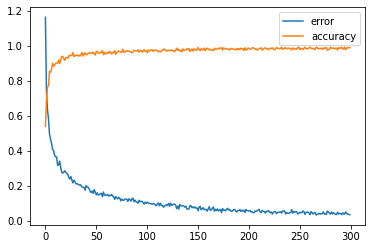

In [4]:
import matplotlib.pyplot as plt
plt.figure('error vs epoch')
plt.plot(history.history['loss'],label = 'error')
plt.plot(history.history['categorical_accuracy'],label = 'accuracy')
plt.legend()
# history.history

In [5]:
test_data = data[488:]
test_x = []
test_y = []

for i in range(len(test_data)):
    if '?' in test_data[i]:
        test_data[i][test_data[i].index('?')] = '-1'
    test_x.append([float(j) for j in test_data[i][0:-1]])
    if int(test_data[i][-1]) == 1:
        test_y.append([1,0,0,0])
    elif int(test_data[i][-1]) == 2:
        test_y.append([0,1,0,0])
    elif int(test_data[i][-1]) == 3:
        test_y.append([0,0,1,0])
    else:
        test_y.append([0,0,0,1])



In [6]:
test_x = np.array(test_x)
test_y = np.array(test_y)    
test_x.shape, test_y.shape
prediction = model.predict(test_x)
# count = 0
# for i in range(len(prediction)):
#     prediction[i] = [round(prediction[i][0],0),round(prediction[i][1],0),round(prediction[i][2],0),round(prediction[i][3],0)]
#     if (prediction[i] == test_y[i]).all():
#         count += 1
#     else:
#         print(prediction[i],test_y[i])
# count/len(prediction)
# # prediction[0:10],test_y[0:10]
prediction =  prediction.tolist()
test_y = test_y.tolist()
for i in range(len(prediction)):
    prediction[i] = prediction[i].index(max(prediction[i]))
    test_y[i] = test_y[i].index(max(test_y[i]))
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(test_y,prediction),accuracy_score(test_y,prediction)

(array([[132,   7],
        [  3,  69]], dtype=int64),
 0.95260663507109)

In [7]:


# prediction[0:5], test_y[0:5]